In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

from astropy import wcs
import astropy
from astropy.io import fits
from astropy import convolution
from astropy import nddata

from scipy import ndimage
import scipy.ndimage as scimg

In [3]:
# path = '/Users/ian/Desktop/2020-01-07--04-14-24--151.fits'
path = "C:/Users/16472/Desktop"

In [4]:
# Helper Functions

def Imshow(image, title, **kwargs):
    plt.figure(figsize=(16,12))
    plt.title(title)
    plt.imshow(image, origin='lower', interpolation='none', **kwargs)
    plt.colorbar(shrink=0.8)

def psd2d(image):
    fft = np.fft.fft2(image)
    p2d = np.power(np.abs(fft), 2)
    return p2d

In [5]:
# Introduce images here.

# Image
hdul = astropy.io.fits.open("2020-01-07--04-14-24--151.fits")
image_array = hdul[0].data

# Flat- Field
xsc1_ff = np.load("xsc1_flat_Field.npy")

# Filtering and Flat Fielding
filtered_image = image_array / xsc1_ff
filtered_image -= np.mean(image_array)

smimage = ndimage.gaussian_filter(filtered_image, sigma=5)

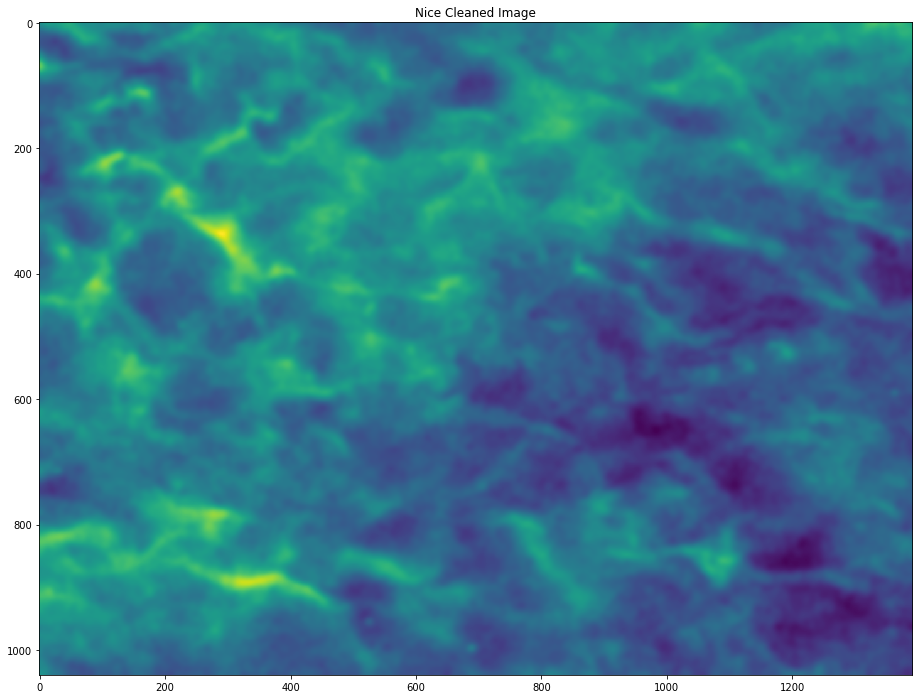

In [6]:
plt.figure("image_array", figsize= (16, 12))
plt.title("Nice Cleaned Image")
plt.imshow(smimage)
# plt.colorbar()
plt.show()

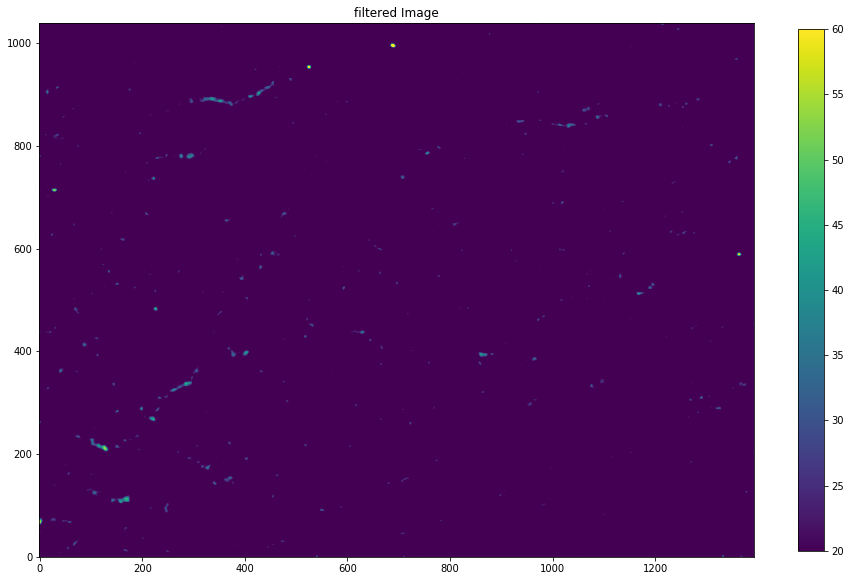

In [7]:
# Very Nicely Cleaned Image here.

Imshow(ndimage.gaussian_filter(filtered_image - smimage, sigma=3), title="filtered Image", vmin=20, vmax=60)

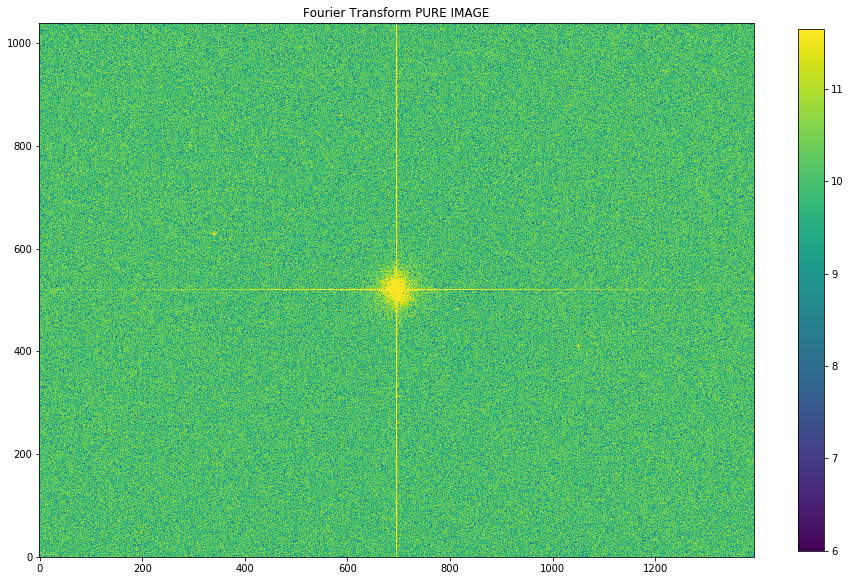

In [8]:
# Okay so taking the above image.
# Now to apply Fourier Transforms

# Fourier Transform of image VERBATIM
fft_image = psd2d(image_array)
# print(image_array)
Imshow(np.fft.fftshift(np.log10(fft_image)), title="Fourier Transform PURE IMAGE", vmin=6, vmax=np.mean(np.log10(fft_image)) + np.std(np.log10(fft_image))*3)

9.85335648487279


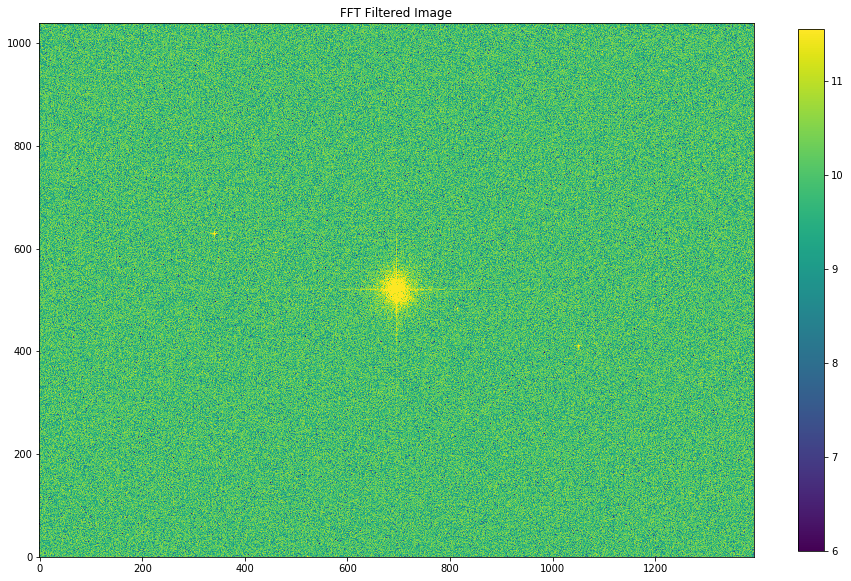

In [11]:
# Fourier Transform of image with Flat Field applied

fft_f_image = psd2d(filtered_image)

print(np.mean(np.fft.fftshift(np.log10(fft_f_image))))
Imshow(np.fft.fftshift(np.log10(fft_f_image)), title="FFT Filtered Image", vmin=6, vmax=np.mean(np.log10(fft_f_image)) + np.std(np.log10(fft_f_image))*3)

[[-0.24535275  1.42332503  0.97947348 ...  1.12926053  0.97947348
   1.42332503]
 [ 0.69132128  1.12982934  1.18148118 ...  1.49899829  0.78081587
   0.35542014]
 [ 1.2358687   0.82482239  0.88829702 ...  1.18033798  1.10841915
   1.32272762]
 ...
 [ 0.76144704  1.8265473   0.75714185 ...  0.59301407  0.77395233
   0.61288268]
 [ 1.2358687   1.32272762  1.10841915 ...  0.7593455   0.88829702
   0.82482239]
 [ 0.69132128  0.35542014  0.78081587 ...  1.44619731  1.18148118
   1.12982934]]


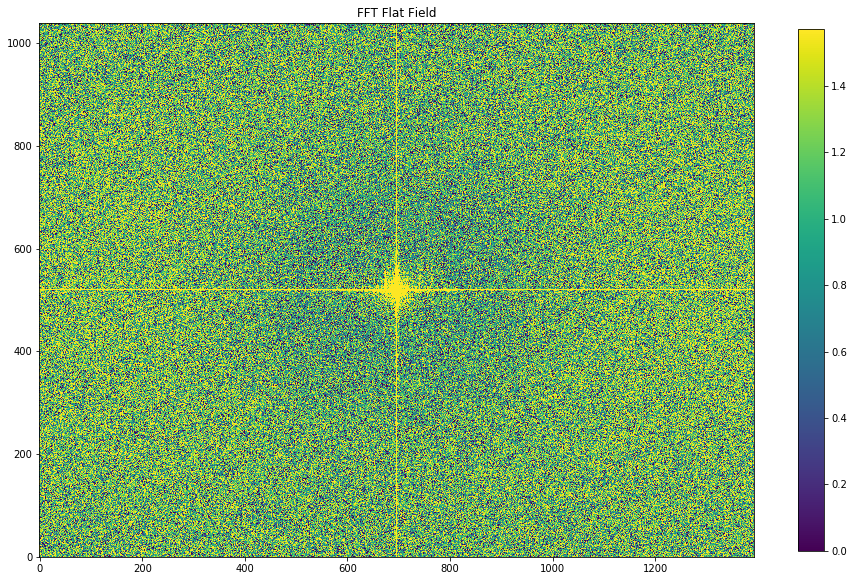

In [10]:
# Fourier Transform of the Flat Field

fft_flat_field = psd2d(xsc1_ff)
Imshow(np.fft.fftshift(np.log10(fft_flat_field)), title="FFT Flat Field", vmin=0, vmax=np.mean(np.log10(fft_flat_field)) + np.std(np.log10(fft_flat_field)))
# print(np.log10(fft_flat_field))
# There is structure 

In [137]:
# Few Questions Up to this point
# 
# What does fft shifting it do?
# Why are we raising everything to the power of 2
# Why are we doing log scale on it after?

C:\Users\16472\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in power
  del sys.path[0]
C:\Users\16472\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


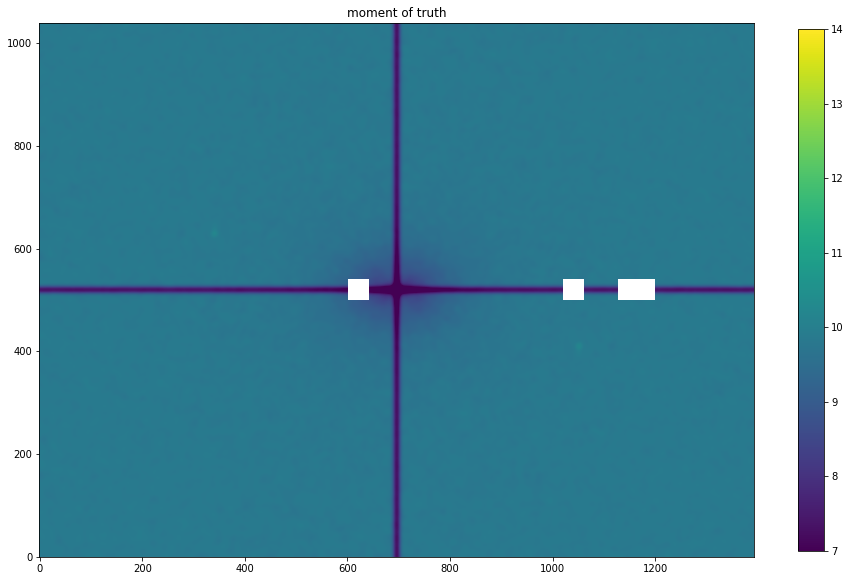

In [231]:
# James also did some cool filtering called wiener filtering?
#
# Let me do the same thing with our filtering as well.
#

ny, nx = image_array.shape
kx = np.outer(np.ones(ny), np.fft.fftfreq(nx))
ky = np.outer(np.fft.fftfreq(ny), np.ones(nx))
k = np.power(kx**2 + ky**2, 0.5)

xyfilt = np.ones_like(image_array)
xyfilt[ky == 0] = 0
xyfilt[kx == 0] = 0

wfilt = 1.5e10/(2.0e12*np.power(k/0.01,-2.5) + 1.5e10)
wfilt[k==0] = 0

# Using flat field applied this time
wfimage = np.fft.ifft2(np.fft.fft2(filtered_image)*wfilt*xyfilt).real
Imshow(ndimage.gaussian_filter(np.fft.fftshift(np.log10(psd2d(wfimage))),sigma=5), title="moment of truth",vmin=7, vmax=14)

# Don't really Understand what this is supposed to show.